In [6]:
from utilities import create_split_dataloaders, PASTIS
from models import UNet
from utilities import get_rgb
import torch
from models.UNet_module import UNet
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
standard_arguments = {
    'path_to_pastis': './data/PASTIS', 
    'data_files': 'DATA_S2', 
    'label_files': 'ANNOTATIONS',
    'pad':False
}

options = {
    'rgb_temp': {'rgb_only': True, 'multi_temporal': True},
    'rgb_ntemp': {'rgb_only': True, 'multi_temporal': False},
    'spec_temp': {'rgb_only': False, 'multi_temporal': True},
    'spec_ntemp': {'rgb_only': False, 'multi_temporal': False}
}

data_sets = {}
for name, option in options.items():
    data_sets[name] = DataLoader(PASTIS(**standard_arguments, **option), batch_size=1, shuffle=False)

In [9]:
{k:v.__iter__().__next__()[0].shape for k, v in data_sets.copy().items()}

{'rgb_temp': torch.Size([1, 38, 3, 128, 128]),
 'rgb_ntemp': torch.Size([1, 3, 128, 128]),
 'spec_temp': torch.Size([1, 38, 10, 128, 128]),
 'spec_ntemp': torch.Size([1, 10, 128, 128])}

In [10]:
unet_arguments = {
    # 'rgb_temp': {
    #     'enc_chs': [3, 64, 128, 256, 512],
    #     'dec_chs': [512, 256, 128, 64],
    #     'num_class': 20,
    #     'retain_dim': True,
    # },
    'rgb_ntemp': {
        'enc_chs': [3, 64, 128, 256, 512],
        'dec_chs': [512, 256, 128, 64],
        'num_class': 20,
        'retain_dim': True,
    },
    # 'spec_temp': {
    #     'enc_chs': [10, 64, 128, 256, 512],
    #     'dec_chs': [512, 256, 128, 64],
    #     'num_class': 20,
    #     'retain_dim': True,
    # },
    'spec_ntemp': {
        'enc_chs': [10, 64, 128, 256, 512],
        'dec_chs': [512, 256, 128, 64],
        'num_class': 20,
        'retain_dim': True,
    },
}

In [11]:
models = {k: UNet(**unet_arguments[k]) for k in unet_arguments.keys()}

In [12]:
results = models['rgb_ntemp'](data_sets['rgb_ntemp'].__iter__().__next__()[0])
results.shape, results[0, :].shape

(torch.Size([1, 128, 128]), torch.Size([128, 128]))

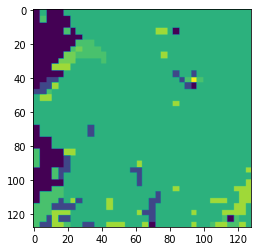

In [13]:
results = models['spec_ntemp'](data_sets['spec_ntemp'].__iter__().__next__()[0])
plt.imshow(results[0, :])

In [14]:
data_sets['rgb_temp'].__iter__().__next__()[0][0,:].shape

torch.Size([38, 3, 128, 128])

In [15]:
from models.backbones import ConvLSTM_Seg
import torch

In [28]:
convlstm = ConvLSTM_Seg(
    num_classes=20,
    input_size=(128, 128),
    input_dim=10,
    hidden_dim=128,
    kernel_size=(3, 3),
    pad_value=0,
    num_layers=3,
)

test_x, test_y = data_sets['spec_temp'].__iter__().__next__()
result = convlstm(test_x)

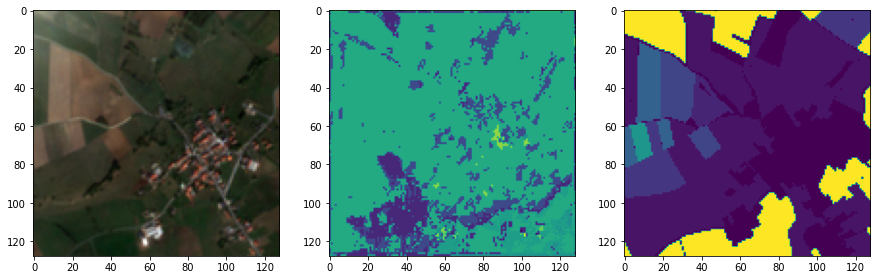

In [29]:
fig, axs= plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(get_rgb(test_x))
axs[1].imshow(np.argmax(result.detach().numpy(), axis=1)[0,:])
axs[2].imshow(test_y[0,:])
pass

In [25]:
test_y[0,:]

tensor([[19., 19., 19.,  ...,  3.,  3.,  3.],
        [19., 19., 19.,  ...,  3.,  3.,  3.],
        [19., 19., 19.,  ...,  3.,  3.,  3.],
        ...,
        [19., 19., 19.,  ...,  1.,  1.,  1.],
        [19., 19., 19.,  ...,  1.,  1.,  1.],
        [19., 19., 19.,  ...,  1.,  1.,  1.]])